# <span style="color:blue"> SLACK - BOT</span>
## Análisis de emojis

In [2]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json

In [3]:
df = pd.read_csv('files/slack_historial_de_mensajes_filtrados.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'index', 'Unnamed: 0.1', 'client_msg_id', 'type', 'text',
       'ts', 'team', 'blocks', 'bot_id', 'bot_profile', 'files', 'upload',
       'display_as_bot', 'thread_ts', 'reply_count', 'reply_users_count',
       'latest_reply', 'reply_users', 'subscribed', 'reactions', 'subtype',
       'inviter', 'edited', 'attachments', 'Channel_id', 'Channel_name',
       'bot_link', 'purpose', 'user_hash', 'datetime', 'date', 'time', 'h',
       'm', 's', 'translations'],
      dtype='object')

In [5]:
df.shape

(378, 37)

In [6]:
df = df.dropna(subset=['reactions'])

In [7]:
df['reactions'].count()

21

In [8]:
df.reset_index(inplace=True)

In [9]:
df['index'] = df.index

## Obtención de reacciones

In [18]:
df_reactions= pd.DataFrame({'channel_name':[],
                            'message_date':[],
                            'name': [], 
                            'counts': [],
                           'user_hash':[]})
df_reactions

,channel_name,message_date,name,counts,user_hash


In [21]:
for i, message in df.iterrows():
    # guardo el nombre del canal
    channel_name = message['Channel_name']
    message_date = message['date']
    user_hash = message['user_hash']
    
    # paso las reacciones a formato lista en vez de string
    reactions = message['reactions'].replace("'", "\"")
    reactions_list = json.loads(reactions)
    
    for reaction in reactions_list:
        # guardo la reacción y el conteo
        name= reaction['name']
        counts= reaction['count']
        df_reactions.loc[i]=[channel_name,message_date,name,counts, user_hash]
        
df_reactions

,channel_name,message_date,name,counts,user_hash
0,dailys,2020-10-15,smile,1.0,ee2b02f7f3ecf01dd408031780cb1521
1,dailys,2020-10-14,joy,1.0,dc71163e5963271a52952b547d9b3757
2,dailys,2020-10-14,+1,1.0,9de0eab41d06af99a9db556b51b6585d
3,dailys,2020-10-06,+1,1.0,ee2b02f7f3ecf01dd408031780cb1521
4,novedades,2020-10-27,+1,1.0,9de0eab41d06af99a9db556b51b6585d
5,novedades,2020-10-27,smile,1.0,ee2b02f7f3ecf01dd408031780cb1521
6,novedades,2020-10-19,+1,1.0,ee2b02f7f3ecf01dd408031780cb1521
7,novedades,2020-10-16,+1,1.0,557bc07852e5ca8d2568185fb02896db
8,test,2020-10-26,+1,2.0,dc71163e5963271a52952b547d9b3757
9,test,2020-10-21,+1,1.0,dc71163e5963271a52952b547d9b3757


In [12]:
df_reactions['message_date'] = pd.to_datetime(df_reactions['message_date'])

In [22]:
df_reactions.dtypes

channel_name     object
message_date     object
name             object
counts          float64
user_hash        object
dtype: object

## Análisis de reacciones
### Conteos

In [23]:
# Tabla de contingencia

print('CONTEO DE REACCIONES POR CANAL')

pd.crosstab(index=df_reactions['channel_name'],
            columns=df_reactions['name'], margins=True)

CONTEO DE REACCIONES POR CANAL


name,+1,clap,grinning,heart,joy,raised_hands,smile,tada,All
channel_name,,,,,,,,,
dailys,2,0,0,0,1,0,1,0,4
general,3,0,0,0,0,0,0,0,3
novedades,3,0,0,0,0,0,1,0,4
test,4,1,1,1,0,1,1,1,10
All,12,1,1,1,1,1,3,1,21


Text(0.5, 0, '')

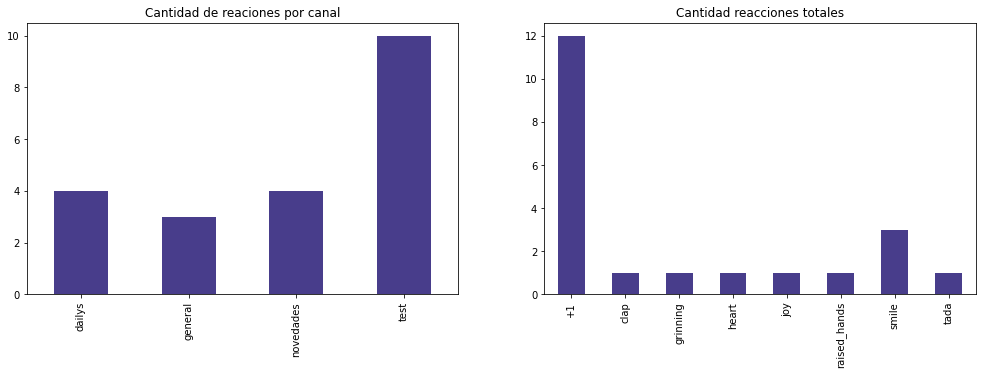

In [24]:
plt.figure (figsize=(17,5))

plt.subplot(121)
df_reactions.groupby('channel_name').count()['counts'].plot(kind='bar', color='darkslateblue')
plt.title('Cantidad de reaciones por canal')
plt.xlabel('')

plt.subplot(122)
df_reactions.groupby('name').count()['counts'].plot(kind='bar', color='darkslateblue')
plt.title('Cantidad reacciones totales')
plt.xlabel('')

Text(0.5, 0, '')

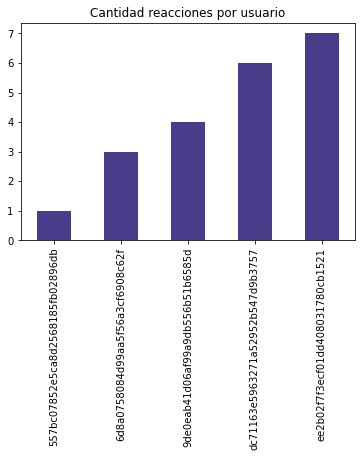

In [30]:
df_reactions.groupby('user_hash').count()['counts'].plot(kind='bar', color='darkslateblue')
plt.title('Cantidad reacciones por usuario')
plt.xlabel('')

<Figure size 1440x720 with 0 Axes>

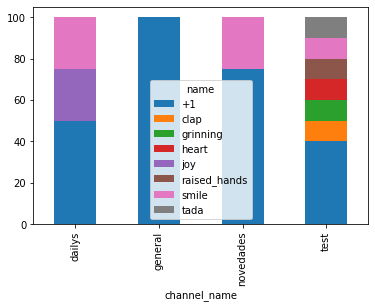

In [17]:
plt.figure(figsize=(20,10))
plot = pd.crosstab(index=df_reactions['channel_name'],
                  columns=df_reactions['name']).apply(lambda r: r/r.sum()*100,axis=1).plot(kind='bar', stacked=True)

### Porcentajes

In [17]:
# tabla de contingencia en porcentajes relativos total

print('PORCENTAJE DE REACCIONES POR CANAL')

pd.crosstab(index=df_reactions['channel_name'], 
            columns=df_reactions['name'],margins=True).apply(lambda r: r/len(df_reactions) *100, axis=1).round()

PORCENTAJE DE REACCIONES POR CANAL


name,+1,clap,grinning,heart,joy,raised_hands,smile,tada,All
channel_name,,,,,,,,,
dailys,10.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,19.0
general,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
novedades,14.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,19.0
test,19.0,5.0,5.0,5.0,0.0,5.0,5.0,5.0,48.0
All,57.0,5.0,5.0,5.0,5.0,5.0,14.0,5.0,100.0


Text(0, 0.5, '')

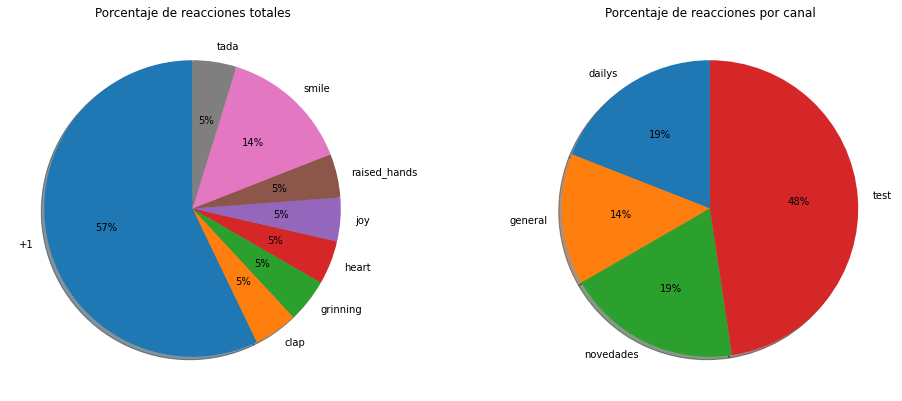

In [18]:
plt.figure (figsize=(17,15))

plt.subplot(223)
df_reactions.groupby('name').count()['counts'].plot(kind='pie',
                                                    autopct='%1.0f%%',
                                                    shadow=True, 
                                                    startangle=90)
plt.title('Porcentaje de reacciones totales')
plt.xlabel('')
plt.ylabel('')

plt.subplot(224)
df_reactions.groupby('channel_name').count()['counts'].plot(kind='pie',
                                                            autopct='%1.0f%%',
                                                            shadow=True, 
                                                            startangle=90)
plt.title('Porcentaje de reacciones por canal')
plt.xlabel('')
plt.ylabel('')

In [19]:
df_reactions.set_index('message_date', inplace=True)

In [20]:
df_sub= df_reactions['counts']

<AxesSubplot:xlabel='message_date'>

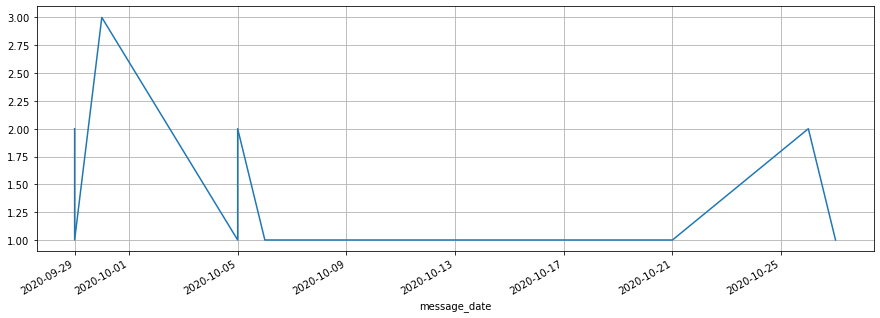

In [21]:
# Ahora que la variable 'datetime' se reconoce como una serie de tiempo, es momento de visualizar nuestros datos
df_sub.plot(grid=True, figsize=(15,5))